In [1]:
#Figure Explicability- December 2021
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import gsw
import seaborn as sns

os.getcwd()
pathfig = '/home1/datawork/epauthen/Fig_Product/Figure_clean/'


In [3]:
ds = xr.open_dataset('/home/datawork-lops-bluecloud/osnet/Fig_explicability/shap_values_EXP1.nc')
#Sort by temperature importance
CT_val = ds['CT_abs_importance'].mean(dim=['N_PROF', 'model', 'PRES_INTERPOLATED'])/sum(ds['CT_abs_importance'].mean(dim=['N_PROF', 'model', 'PRES_INTERPOLATED']))
ds = ds.assign(CT_val = CT_val)
ds = ds.sortby(CT_val, ascending=False)

#Rename inputs
ds['input_name'] = np.array(['SST', 'MDT', 'lat', 'SLA', 'sin(day)', 'lon', 'cos(day)', 'bathy','UGOS', 'VGOS', 'VGOSA', 'UGOSA'], dtype=object)
ds = ds.rename({"CT_abs_importance": "Temperature"})
ds = ds.rename({"SA_abs_importance": "Salinity"})
ds = ds.rename({"MLD_abs_importance": "MLD"})
ds

<xarray.Dataset>
Dimensions:            (N_PROF: 300, PRES_INTERPOLATED: 51, input_name: 12, model: 15)
Coordinates:
  * input_name         (input_name) object 'SST' 'MDT' 'lat' ... 'VGOSA' 'UGOSA'
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 1 2 3 4 ... 773 857 950 1000
Dimensions without coordinates: N_PROF, model
Data variables:
    SA_importance      (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    CT_importance      (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    MLD_importance     (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    Salinity           (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    Temperature        (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    MLD                (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    CT_val             (input_name) float64 0.3753 0.1935 ... 0.009594 0.008348

In [4]:
#Store in a dataframe
df_SA = (ds.Salinity.mean(dim = ['N_PROF','PRES_INTERPOLATED'])/sum(ds.Salinity.mean(dim = ['model','N_PROF','PRES_INTERPOLATED']))).to_dataframe().reset_index()
df_SA['output'] = 'Salinity'
df_SA.rename(columns={"Salinity": "importance"},inplace = True)
#
df_CT = (ds.Temperature.mean(dim = ['N_PROF','PRES_INTERPOLATED'])/sum(ds.Temperature.mean(dim = ['model','N_PROF','PRES_INTERPOLATED']))).to_dataframe().reset_index()
df_CT['output'] = 'Temperature'
df_CT.rename(columns={"Temperature": "importance"},inplace = True)
#
df_MLD = (ds.MLD.mean(dim = ['N_PROF','PRES_INTERPOLATED'])/sum(ds.MLD.mean(dim = ['model','N_PROF','PRES_INTERPOLATED']))).to_dataframe().reset_index()
df_MLD['output'] = 'MLD'
df_MLD.rename(columns={"MLD": "importance"},inplace = True)
df_CT
df = pd.concat([df_CT,df_SA , df_MLD])


In [5]:
df

,model,input_name,importance,output
0,0,SST,0.366070,Temperature
1,0,MDT,0.184500,Temperature
2,0,lat,0.110036,Temperature
3,0,SLA,0.085148,Temperature
4,0,sin(day),0.064939,Temperature
...,...,...,...,...
175,14,bathy,0.012315,MLD
176,14,UGOS,0.013155,MLD
177,14,VGOS,0.010807,MLD
178,14,VGOSA,0.009388,MLD


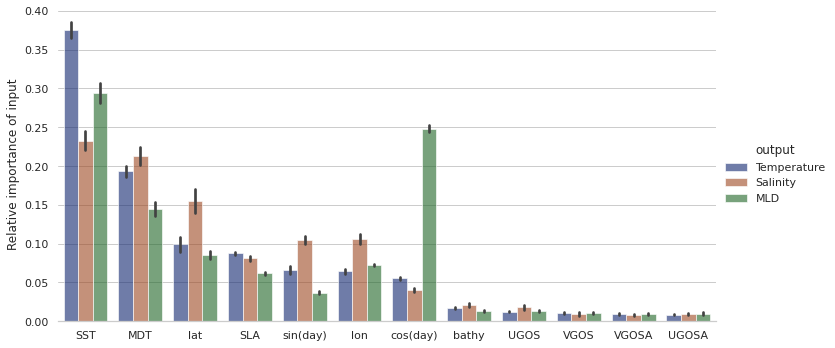

In [7]:
# Draw a nested barplot by species and sex
sns.set_theme(style="whitegrid")
g = sns.catplot(height=5, aspect=2,
    data=df, kind="bar",
    x="input_name", y="importance", hue="output",
    ci="sd", palette="dark", alpha=.6)
g.despine(left=True)
g.set_axis_labels("", "Relative importance of input")

plt.savefig(pathfig + 'Explicability.png', transparent=False)
plt.show()